In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [36]:
df=load_iris()
x=df.data
y=df.target

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state = 12345)

st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

In [38]:
rf = RandomForestClassifier(n_estimators=100,max_depth=3,bootstrap=True,n_jobs=-1,random_state=0)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
feature_importance=pd.Series(rf.feature_importances_,index=df.feature_names).sort_values(ascending=False)

<Axes: xlabel='None', ylabel='None'>

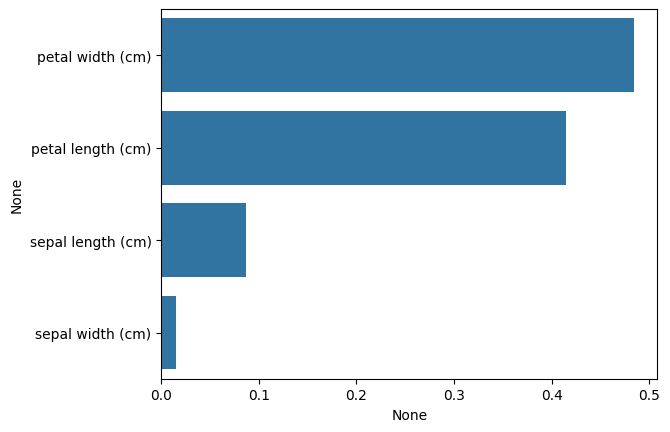

In [39]:
sns.barplot(x=feature_importance,y=feature_importance.index)

In [40]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred)*100,'%')

Accuracy: 93.33333333333333 %


In [43]:
cm=confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index=['True 0', 'True 1','True 2'], columns=['Predicted 0', 'Predicted 1','Predicted 2'])
print(df_cm)

        Predicted 0  Predicted 1  Predicted 2
True 0           11            0            0
True 1            0           11            1
True 2            0            1            6
